### 목표 : 생선 품종 분류 모델
- 데이터 : fish.csv
- 피 쳐 : Weight, Length
- 타 겟 : Species
- 기계학습 : 지도학습 + 분류( 도미, 빙어 분류는 이진분류)

(1) 모듈 로딩 및 데이터 준비 <hr>

In [114]:
import pandas as pd

In [115]:
# 데이터 파일 설정
data_file = '../data/fish.csv'

In [116]:
# DF로 데이터 준비
fishDF = pd.read_csv(data_file, usecols=[0,1,2])
#fishDF = pd.read_csv(data_file, usecols=["Speices","Weight","Length"])

# 기본정보 확인
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


(2) 데이터 전처리
- 결측치, 중복데이터, 이상치

In [117]:
#컬럼별 고유값으로 이상치 체크 = > unique()
print("fishDF.Species => ", fishDF.Species.unique())
print("fishDF.Weight => ", fishDF.Weight.unique())
print("fishDF.Length => ", fishDF.Length.unique())

fishDF.Species =>  ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
fishDF.Weight =>  [ 242.   290.   340.   363.   430.   450.   500.   390.   475.   600.
  700.   610.   650.   575.   685.   620.   680.   725.   720.   714.
  850.  1000.   920.   955.   925.   975.   950.    40.    69.    78.
   87.   120.     0.   110.   150.   145.   160.   140.   169.   161.
  200.   180.   272.   270.   306.   540.   800.    55.    60.    90.
  170.   273.   300.     5.9   32.    51.5   70.   100.    80.    85.
  115.   125.   130.   135.   225.   188.   197.   218.   260.   265.
  250.   320.   514.   556.   840.   690.   900.   820.  1015.  1100.
  345.   456.   510.   567.   770.  1250.  1600.  1550.  1650.     6.7
    7.5    7.     9.7    9.8    8.7   10.     9.9   12.2   13.4   19.7
   19.9]
fishDF.Length =>  [25.4 26.3 26.5 29.  29.7 30.  30.7 31.  31.5 32.  33.  33.5 34.  34.5
 35.  36.  37.  38.5 39.5 41.  14.1 18.2 18.8 19.8 20.  20.5 20.8 21.
 22.  22.5 24.  23.4 23.5 25.2 

In [118]:
#결측치 체크 => isna() / isnull()
fishDF.isna().sum()

Species    0
Weight     0
Length     0
dtype: int64

In [119]:
# 중복데이터 체크 => duplicated()
fishDF.duplicated().sum()

4

In [120]:
# 'Bream', 'Smelt' 두가지 품종 데이터만 추출
# fishDF = fishDF[fishDF['Species'].isin(['Bream', 'Smelt'])]
mask = fishDF['Species'].isin(['Bream', 'Smelt'])
twoFishDF = fishDF[mask]
# 인덱스 리셋 : 기존의 인덱스 삭제 후 0-base 인덱스 설정
twoFishDF=twoFishDF.reset_index(drop=True) 
twoFishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


(3) 학습용 데이터 준비 => 피쳐 + 타겟 분리

In [121]:
feature = twoFishDF[twoFishDF.columns[1:]]
feature.head()

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0


In [122]:
# 타겟 데이터 추출
target = twoFishDF.Species

# Bream => 0, Smelt => 1로 값 변환
# target = target.map({'Bream':0, 'Smelt':1})
target = target.replace({'Bream':0, 'Smelt':1}).copy()
print(target.head(3), target.tail(3), sep='\n\n')

0    0
1    0
2    0
Name: Species, dtype: int64

46    1
47    1
48    1
Name: Species, dtype: int64


(4) 학습 진행
- 알고리즘 구현 인스턴스 생성 => 지도학습 -분류 알고리즘 중 선택
- 학습 진행 메서드 => fit()

In [123]:
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [124]:
# (4-1) KNN 인스턴스 생성
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [125]:
# (4-2) 학습 진행
model.fit(feature, target)

KNeighborsClassifier()

In [126]:
# 학습 후 속성 확인
print("classes_ : ",model.classes_)
print("feature_names_in_ : ",model.feature_names_in_)
print("n_features_in_ : ",model.n_features_in_)

classes_ :  [0 1]
feature_names_in_ :  ['Weight' 'Length']
n_features_in_ :  2


# 학습 데이터는 무조건 2차원 형태를 넣어야 한다!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
 

In [127]:
# 모델을 만들었으니, 검사를 해보자
# (5) 학습 후 검사, 즉 테스트 => 메서드 : score()
# 결괏값은 : 0.0(0%)~1.0(100%)
# 사용 데이터는 학습에 사용되지 않은 데이터를 사용해야 한다 
model.score(feature, target)
# 출력값이 1.0이 나오므로, 100점이다! 

1.0

In [128]:
#(6) 예측, 즉 서비스에 모델 활용 시 사용 => 메서드 : predict()
# 조건 : 학습 시 전달된 데이터와 동일한 형태의 데이터 전달

In [129]:
import sys

print(sys.version)
print(sys.executable)


3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]
c:\ProgramData\anaconda3\envs\EXAM_ML\python.exe


In [130]:
# [무게, 길이]
pred_y=model.predict([[19.9,15]]) # feature이름이 없어서 워닝이 뜬다
pred_y

c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [131]:
# 학습 시 제공된 데이터와 동일한 형태로 제공되야 한다
# 열 이름도 잘 설정해주면, 실행이 잘 된다!
new_data=pd.DataFrame([[19.9,15]], columns=model.feature_names_in_)
pred_y=model.predict(new_data) 
pred_y # 1(smelt)로 잘 분류되었음을 확인할 수 있다

array([1], dtype=int64)

In [132]:
# 없는 데이터로 해보자
new_data=pd.DataFrame([[21.8,17]], columns=model.feature_names_in_)
pred_y=model.predict(new_data)
pred_y # 없는 데이터여도, 1(smelt)로 잘 분류되었음을 확인할 수 있다

array([1], dtype=int64)

In [133]:
# 확률값을 읽어오는 메서드 : predict_proba(X)
# 예측 확률
model.predict_proba(new_data) # 확률값을 보여준다
# 0일 확률은 0.0, 1일 확률은 1.1이라는 것을 알 수 있다

array([[0., 1.]])

In [134]:
feature.index

RangeIndex(start=0, stop=49, step=1)

In [135]:
# 데이터와 최근접 이웃 데이터 알아내기
# 반환값 : 거리, 원소번호 
model.kneighbors(new_data)
# feature.index는 인덱스가 중간에 잘라져서 너저분한데, 
# 반환하는 원소번호는 마치 feature가 reset_index를 적용한 상태로 반환해준다!!!
# => 그러니까, 뽑아낸 데이터한테 reset_index를 평소에 들여두는 습관이 중요하다!



# 해당 값과 제일 가까이 있는 애들 5개를 갖고온다

(array([[ 2.75862284,  3.42052628,  9.57705592, 10.4       , 10.73312629]]),
 array([[48, 47, 45, 46, 44]], dtype=int64))

In [136]:
#따라서 feature를 reset_index해준다
feature.reset_index(inplace=True, drop=True)

In [137]:
# getter/setter 메서드
# -> 속성값 설정 => setter메서드 : set_속성명
# -> 속성값 읽어오기 => getter메서드 : get_속성명
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
# 해당 사이트의 파라미터를 바꿀 수 있다!


# 예를 들어, 모델의 속성값을 확인해보자
# 모델의 속성값 확인
#model.get_params()
# 모델의 속성값 설정
#model.set_params(random_state=0)
# 모델의 속성값 확인
#model.get_params()

In [138]:
new_data.Length.to_list()

[17]

TypeError: plot() got an unexpected keyword argument 'x'

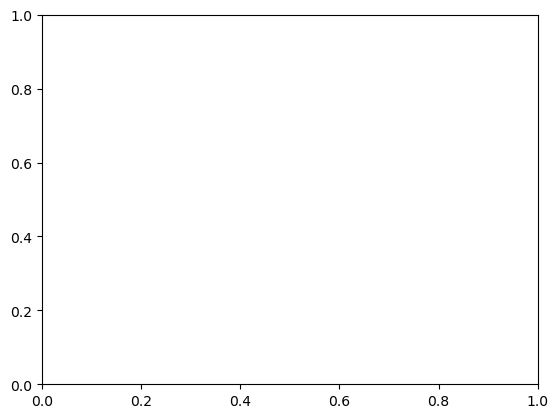

In [139]:
import matplotlib.pyplot as plt
#plt.scatter(feature["Weight"],feature["Length"])
plt.plot(x=new_data.Weight.to_list(),y=new_data.Length.to_list())
plt.show() # 오류를 방출한다  

In [ ]:
new_data.Weight.to_list()[0]

21.8

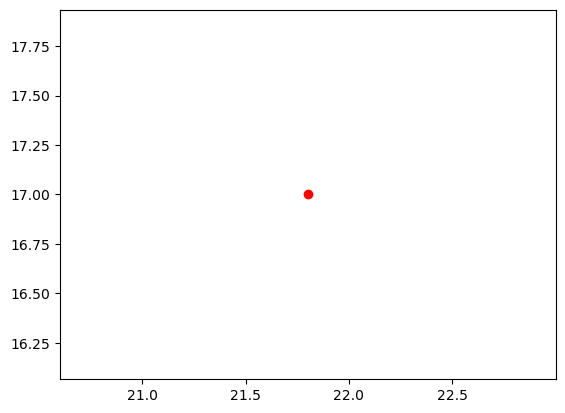

In [ ]:
plt.plot(new_data.Weight.to_list()[0],new_data.Length.to_list()[0],"ro")
plt.show()  

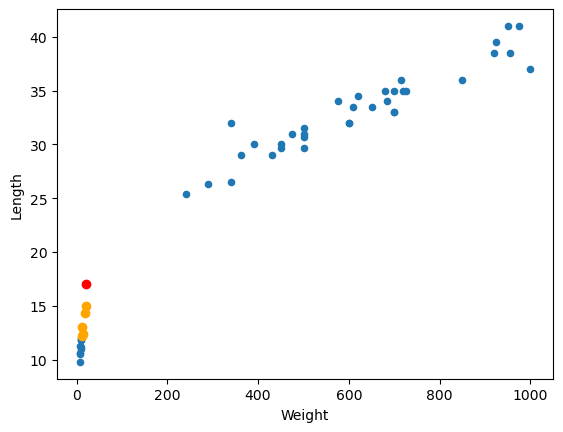

In [157]:
# 제 2안 
# pandas의 Series, DataFrame의 plot() 메서드
colormap=["blue","orange"]
#feature.plot.scatter(x="Weight",y="Length", c=colormap)
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
feature.plot(kind="scatter",x="Weight",y="Length")
#아까 만든 오랜지색점을 추가
plt.plot(new_data.Weight.to_list()[0],new_data.Length.to_list()[0],"ro")
# --------------------------------
# kneighbors로 찾은 이웃을 그래프에 추가로 그리기
x,y = model.kneighbors(new_data)

plt.scatter(feature.loc[y[0]].Weight.to_list(),feature.loc[y[0]].Length.to_list(),c="orange",marker="o")

In [156]:
new_data

,Weight,Length
0,21.8,17


In [158]:
y.flatten()

array([48, 47, 45, 46, 44], dtype=int64)

In [159]:
y

array([[48, 47, 45, 46, 44]], dtype=int64)